In [1]:
#Importando as bibliotecas para o desafio:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
import seaborn as sns; sns.set()
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.model_selection import train_test_split
import seaborn
import warnings
import os
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Biblioteca para mapeamento:
!pip install folium

In [3]:
import folium
from folium import plugins

In [4]:
#Lendo o dataset:
#CSV file

datarj = pd.read_csv('dataset-faturamento.csv',header=(0))
print("Número de linhas e colunas:", datarj.shape)
datarj.head(10)

Número de linhas e colunas: (160, 23)


,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,...,0,145,715,1242,1093,758,92,304,2501.0,932515.0
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,...,0,0,82,506,2040,2490,827,2506,931.0,588833.0
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,...,0,96,404,652,644,522,77,254,2391.0,874200.0
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,...,114,178,393,517,945,584,137,286,3727.0,912226.0
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,...,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0
5,3304557034,Andaraí,Rio de Janeiro,RJ,40476,3528,1703,2564,2753,5993,...,290,1245,3647,3321,3289,2419,304,1059,3443.0,1204467.0
6,3304557082,Anil,Rio de Janeiro,RJ,24855,2427,1227,1777,1804,3730,...,355,759,1771,1863,1902,1155,326,424,NaN,1092081.0
7,3304557115,Bancários,Rio de Janeiro,RJ,12864,1532,670,963,1076,2083,...,0,82,491,750,1313,1177,172,352,1962.0,808554.0
8,3304557099,Bangu,Rio de Janeiro,RJ,249987,32651,15949,20926,20146,37750,...,0,496,5246,13274,24363,22447,4564,11109,1550.0,35465.0
9,3304557131,Barra Da Tijuca,Rio de Janeiro,RJ,139761,13038,5225,7432,8627,21914,...,13408,11668,14820,5205,3437,1841,0,3897,18084.0,2915612.0


In [5]:
#Descrição do dataframe:
datarj.describe()

,codigo,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
count,1.600000e+02,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,154.000000,1.600000e+02
mean,3.304557e+09,42654.350000,5329.06250,2484.443750,3272.156250,3349.381250,6584.475000,8826.862500,5332.262500,7475.706250,388.475000,608.268750,1871.562500,2385.075000,3539.850000,3030.806250,568.37500,1821.612500,3608.071429,8.761600e+05
std,4.633213e+01,64262.949072,10816.19977,4948.827166,5752.156303,5601.893201,9049.895783,11536.276416,7986.261929,10258.307743,1403.605232,1535.237669,2973.530791,2779.071565,4324.539462,4003.047836,823.92034,2292.079295,6091.865305,4.382106e+05
min,3.304557e+09,173.000000,33.00000,13.000000,22.000000,17.000000,28.000000,38.000000,10.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.00000,2.000000,654.000000,2.465100e+04
25%,3.304557e+09,13362.750000,1512.75000,690.750000,945.000000,994.750000,2131.250000,2900.750000,1598.750000,2118.250000,0.000000,0.000000,391.500000,716.000000,1088.750000,789.750000,117.75000,431.500000,1486.000000,7.112785e+05
50%,3.304557e+09,26076.000000,3111.50000,1434.000000,2015.000000,2142.500000,4170.500000,5657.000000,3371.500000,4575.500000,0.000000,107.500000,848.000000,1536.000000,2394.500000,1861.500000,327.50000,1042.500000,1915.500000,8.242285e+05
75%,3.304557e+09,46504.500000,5622.25000,2621.500000,3448.750000,3451.750000,7145.250000,9586.750000,6333.250000,9196.000000,1.000000,430.500000,1962.500000,3065.750000,4203.000000,3652.500000,694.00000,2138.250000,2954.500000,9.343208e+05
max,3.304557e+09,667603.000000,122578.00000,55935.000000,62342.000000,60567.000000,86116.000000,105316.000000,83341.000000,91408.000000,13408.000000,11668.000000,19350.000000,21237.000000,33111.000000,25779.000000,4956.00000,14833.000000,63887.000000,2.915612e+06


In [6]:
datarj["rendaMedia"]

0      2501.0
1       931.0
2      2391.0
3      3727.0
4      1380.0
        ...  
155    2316.0
156    2416.0
157    3189.0
158    2418.0
159    3791.0
Name: rendaMedia, Length: 160, dtype: float64

In [7]:
#Informações sobre o arquivo:
datarj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        160 non-null    int64  
 1   nome          160 non-null    object 
 2   cidade        160 non-null    object 
 3   estado        160 non-null    object 
 4   população     160 non-null    int64  
 5   popAte9       160 non-null    int64  
 6   popDe10a14    160 non-null    int64  
 7   popDe15a19    160 non-null    int64  
 8   popDe20a24    160 non-null    int64  
 9   popDe25a34    160 non-null    int64  
 10  popDe35a49    160 non-null    int64  
 11  popDe50a59    160 non-null    int64  
 12  popMaisDe60   160 non-null    int64  
 13  domiciliosA1  160 non-null    int64  
 14  domiciliosA2  160 non-null    int64  
 15  domiciliosB1  160 non-null    int64  
 16  domiciliosB2  160 non-null    int64  
 17  domiciliosC1  160 non-null    int64  
 18  domiciliosC2  160 non-null    

In [8]:
#Verificando dados faltantes:
datarj.isnull().sum().sort_values(ascending=False)

rendaMedia      6
codigo          0
popMaisDe60     0
domiciliosE     0
domiciliosD     0
domiciliosC2    0
domiciliosC1    0
domiciliosB2    0
domiciliosB1    0
domiciliosA2    0
domiciliosA1    0
popDe50a59      0
nome            0
popDe35a49      0
popDe25a34      0
popDe20a24      0
popDe15a19      0
popDe10a14      0
popAte9         0
população       0
estado          0
cidade          0
faturamento     0
dtype: int64

In [9]:
#Extrair a mediana de rendaMedia
rendaMedia_mediana = datarj.rendaMedia.median()
print(rendaMedia_mediana)

1915.5


In [10]:
#preencher dados faltantes de rendaMedia com a mediana
datarj.fillna(rendaMedia_mediana, inplace = True)

#checar se há valor ausente:
datarj.rendaMedia.isnull().sum()

0

In [11]:
#Verificar se há linha duplicada
datarj.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
155    False
156    False
157    False
158    False
159    False
Length: 160, dtype: bool

In [12]:
#Modificando o cabeçalho nome
datarj.rename({"nome":"bairro"}, axis="columns", inplace = True)
datarj

,codigo,bairro,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,...,0,145,715,1242,1093,758,92,304,2501.0,932515.0
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,...,0,0,82,506,2040,2490,827,2506,931.0,588833.0
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,...,0,96,404,652,644,522,77,254,2391.0,874200.0
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,...,114,178,393,517,945,584,137,286,3727.0,912226.0
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,...,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3304557062,Vila Kosmos,Rio de Janeiro,RJ,18791,1802,921,1442,1462,2500,...,0,259,774,1363,1923,1379,190,405,2316.0,901446.0
156,3304557093,Vila Militar,Rio de Janeiro,RJ,13556,1888,787,1042,982,2542,...,0,219,714,828,1051,1012,116,465,2416.0,849731.0
157,3304557091,Vila Valqueire,Rio de Janeiro,RJ,33190,3166,1619,2255,2326,4752,...,0,906,2866,2241,2982,1200,360,772,3189.0,1127042.0
158,3304557065,Vista Alegre,Rio de Janeiro,RJ,8867,724,387,580,565,1205,...,0,87,556,836,940,484,75,214,2418.0,921875.0


In [13]:
#Excluir colunas desnecessárias à análise
datarj.drop(columns = ["codigo", "cidade", "estado"], inplace = True)
datarj

,bairro,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,Abolição,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0
1,Acari,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,588833.0
2,Água Santa,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,874200.0
3,Alto Da Boa Vista,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,912226.0
4,Anchieta,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Vila Kosmos,18791,1802,921,1442,1462,2500,3944,2920,3800,0,259,774,1363,1923,1379,190,405,2316.0,901446.0
156,Vila Militar,13556,1888,787,1042,982,2542,2908,1528,1879,0,219,714,828,1051,1012,116,465,2416.0,849731.0
157,Vila Valqueire,33190,3166,1619,2255,2326,4752,7183,4950,6939,0,906,2866,2241,2982,1200,360,772,3189.0,1127042.0
158,Vista Alegre,8867,724,387,580,565,1205,1812,1474,2120,0,87,556,836,940,484,75,214,2418.0,921875.0


In [14]:
#Maximos para o datarj:
datarj.max()

bairro          Água Santa
população           667603
popAte9             122578
popDe10a14           55935
popDe15a19           62342
popDe20a24           60567
popDe25a34           86116
popDe35a49          105316
popDe50a59           83341
popMaisDe60          91408
domiciliosA1         13408
domiciliosA2         11668
domiciliosB1         19350
domiciliosB2         21237
domiciliosC1         33111
domiciliosC2         25779
domiciliosD           4956
domiciliosE          14833
rendaMedia         63887.0
faturamento      2915612.0
dtype: object

In [15]:
#Definindo um estilo para os gráficos:
plt.style.use("bmh")

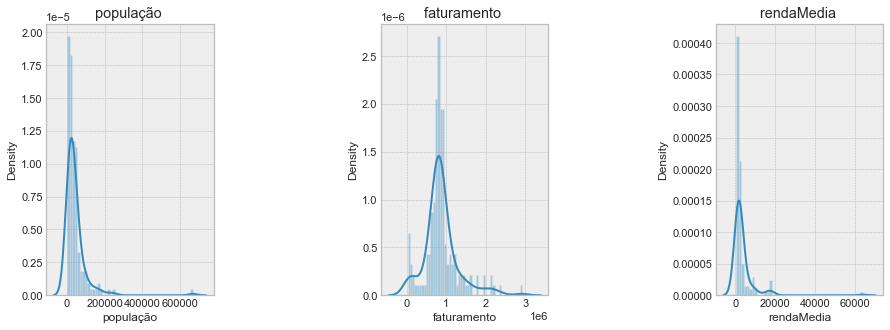

In [16]:
#Verificando as distribuição dos dados:
plt.figure(1 , figsize = (15,5))
n = 0 
for x in ["população" , "faturamento" , "rendaMedia"]:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 1 , wspace = 1)
    sns.distplot(datarj[x] , bins = 50)
    plt.title('{} '.format(x))
plt.show()

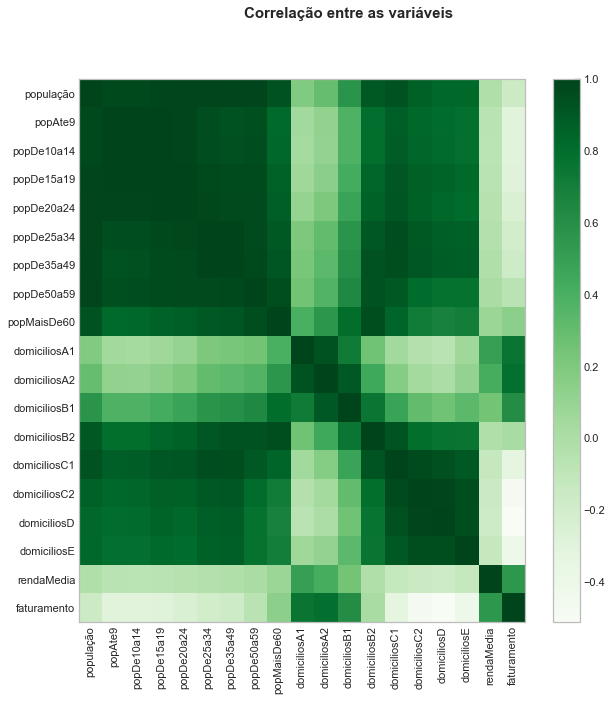

In [17]:
#Obtendo a matriz de correlação dos dados:
corr = datarj.corr()

#Mostrar matriz:
plt.figure(figsize = (10,10))

#Mostrar a imagem:
plt.imshow(corr, cmap='Greens', interpolation='none', aspect='auto')

#Mostrar barra lateral de cores:
plt.colorbar()

#Incluir o nome das variáveis:
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlação entre as variáveis', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

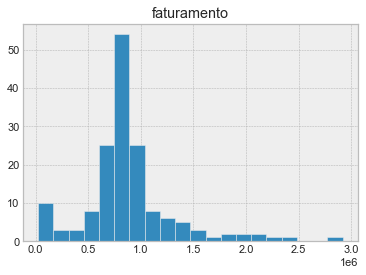

In [18]:
#Histograma do faturamento:

datarj.hist(column = "faturamento", bins = 20)
plt.show()

In [19]:
#PCA DataRJ:
#Scaling DataRJ

features = ["rendaMedia","população", "popAte9", "popDe10a14", "popDe15a19", "popDe20a24", "popDe25a34", "popDe35a49", "popDe50a59", "popMaisDe60"]
x = datarj.loc[:,features].values
y = datarj.loc[:,["bairro"]].values
x = StandardScaler().fit_transform(x)

In [20]:
#PCA DataRJ:

pca = sklearnPCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
print(pca.explained_variance_ratio_)
principalDF

[0.86364393 0.10239955]


,PC1,PC2
0,-1.397683,-0.199304
1,-0.625075,-0.517789
2,-1.506987,-0.241131
3,-1.483682,-0.014163
4,0.688515,-0.371349
...,...,...
155,-1.068307,-0.223932
156,-1.301117,-0.239388
157,-0.444934,-0.039558
158,-1.517952,-0.222982


In [21]:
targetDF = datarj[["bairro"]]
print(targetDF)

                bairro
0             Abolição
1                Acari
2           Água Santa
3    Alto Da Boa Vista
4             Anchieta
..                 ...
155        Vila Kosmos
156       Vila Militar
157     Vila Valqueire
158       Vista Alegre
159              Zumbi

[160 rows x 1 columns]


In [22]:
#Novo DF para bairro e suas variáveis:
pcadata = pd.concat([principalDF, targetDF], axis = 1)
pcadata

,PC1,PC2,bairro
0,-1.397683,-0.199304,Abolição
1,-0.625075,-0.517789,Acari
2,-1.506987,-0.241131,Água Santa
3,-1.483682,-0.014163,Alto Da Boa Vista
4,0.688515,-0.371349,Anchieta
...,...,...,...
155,-1.068307,-0.223932,Vila Kosmos
156,-1.301117,-0.239388,Vila Militar
157,-0.444934,-0.039558,Vila Valqueire
158,-1.517952,-0.222982,Vista Alegre


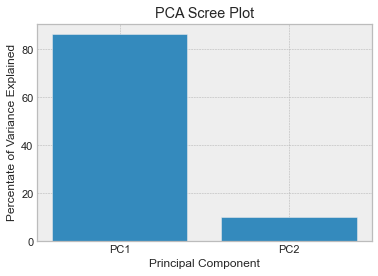

In [23]:
#Explicação por principal componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2']
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2']
plt.bar(x= range(1,3), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Text(0, 0.5, 'PC2')

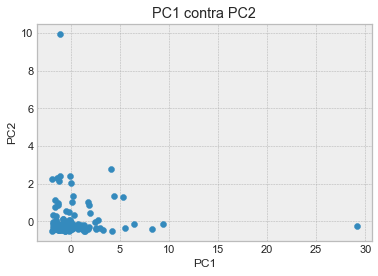

In [24]:
#Plot para averiguação
plt.scatter(principalDF.PC1, principalDF.PC2)
plt.title('PC1 contra PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

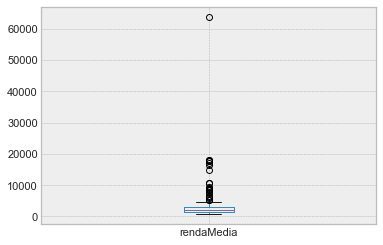

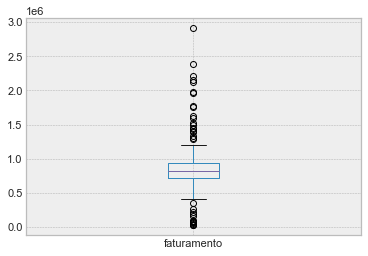

In [25]:
# Boxplot para verificar outliers:

datarj.boxplot(column="rendaMedia")
plt.show()

datarj.boxplot(column="faturamento")
plt.show()

### Dando continuidade à análise exploratória, observando o comportamento das variáveis com os 20 maiores valores para faturamento:

In [26]:
#Top 20 bairros de maior faturamento:
datarj.nlargest(20, "faturamento")[["bairro","rendaMedia","faturamento","população", "popAte9", "popDe10a14", "popDe15a19", "popDe20a24", "popDe25a34", "popDe35a49", "popDe50a59", "popMaisDe60", "domiciliosA1", "domiciliosA2", "domiciliosB1", "domiciliosB2", "domiciliosC1", "domiciliosC2", "domiciliosD", "domiciliosE"]]

,bairro,rendaMedia,faturamento,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE
9,Barra Da Tijuca,18084.0,2915612.0,139761,13038,5225,7432,8627,21914,32089,21058,30378,13408,11668,14820,5205,3437,1841,0,3897
36,Copacabana,7381.0,2384494.0,150524,8562,3727,6383,9168,21814,27567,21858,51445,5740,9218,19350,13160,10982,5482,998,5122
15,Botafogo,8316.0,2211985.0,85229,6278,2608,4410,5911,14697,18262,12026,21037,3669,5165,11669,6106,5289,3009,371,1853
141,Tijuca,7844.0,2157079.0,168267,13033,6405,9750,10968,23657,33313,23892,47249,4351,8306,19076,11631,10755,6539,1280,3723
82,Leblon,14738.0,2119774.0,47342,3134,1380,2131,2390,6177,9519,7181,15430,5423,3532,5342,1863,1890,917,217,1595
50,Flamengo,10619.0,1981817.0,51456,2612,1241,2044,3049,8071,9582,7426,17431,3253,3648,7334,4041,3677,1434,184,986
68,Ipanema,17188.0,1962438.0,43948,3061,1311,1957,2395,5854,8665,6344,14361,4213,3432,4478,2323,2141,1369,117,1460
80,Lagoa,63887.0,1775547.0,21795,1794,708,1054,1252,2943,4812,3594,5638,2916,2140,1931,697,365,306,0,469
81,Laranjeiras,8980.0,1762798.0,46839,3463,1529,2340,2814,7145,9917,6877,12754,2423,3297,5831,3467,3029,1180,118,557
93,Méier,4671.0,1626856.0,51234,3371,1719,2751,3246,6801,9850,8170,15326,510,1873,5463,5089,3911,1570,131,1356


In [27]:
#Novo dataframe com bairros de maior faturamento:

values=[2915612.0, 2384494.0, 2211985.0,2157079.0, 2119774.0, 1981817.0, 1962438.0, 1775547.0, 1762798.0, 1626856.0, 1596252.0,1528242.0, 1491476.0, 1448872.0, 1430429.0, 1409134.0, 1384873.0,1330747.0, 1297388.0, 1289705.0]
maiorfatu = datarj[datarj.faturamento.isin(values)]
maiorfatu

,bairro,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
9,Barra Da Tijuca,139761,13038,5225,7432,8627,21914,32089,21058,30378,13408,11668,14820,5205,3437,1841,0,3897,18084.0,2915612.0
15,Botafogo,85229,6278,2608,4410,5911,14697,18262,12026,21037,3669,5165,11669,6106,5289,3009,371,1853,8316.0,2211985.0
36,Copacabana,150524,8562,3727,6383,9168,21814,27567,21858,51445,5740,9218,19350,13160,10982,5482,998,5122,7381.0,2384494.0
50,Flamengo,51456,2612,1241,2044,3049,8071,9582,7426,17431,3253,3648,7334,4041,3677,1434,184,986,10619.0,1981817.0
52,Freguesia (Jacarepaguá),72501,7991,3709,5257,5159,10923,16875,9607,12980,698,2569,6042,4941,5055,3919,704,1670,1915.5,1297388.0
56,Gávea,16455,1210,546,869,1162,2518,3307,2575,4268,1343,1173,1766,979,776,457,0,311,16449.0,1430429.0
59,Grajaú,39762,3570,1607,2310,2629,5733,8312,5731,9870,737,1516,4647,2968,2333,1740,259,865,6194.0,1409134.0
65,Humaitá,13660,911,349,571,787,2256,2922,2237,3627,799,1139,2136,921,564,313,85,204,9504.0,1289705.0
68,Ipanema,43948,3061,1311,1957,2395,5854,8665,6344,14361,4213,3432,4478,2323,2141,1369,117,1460,17188.0,1962438.0
75,Jardim Botânico,18517,1602,664,945,1008,2788,4135,2822,4553,1641,1273,1913,1108,815,361,0,289,17984.0,1491476.0


In [28]:
maiorfatu['bairro']

9               Barra Da Tijuca
15                     Botafogo
36                   Copacabana
50                     Flamengo
52      Freguesia (Jacarepaguá)
56                        Gávea
59                       Grajaú
65                      Humaitá
68                      Ipanema
75              Jardim Botânico
77             Jardim Guanabara
80                        Lagoa
81                  Laranjeiras
82                       Leblon
89                     Maracanã
93                        Méier
118    Recreio Dos Bandeirantes
131                 São Conrado
141                      Tijuca
154                 Vila Isabel
Name: bairro, dtype: object

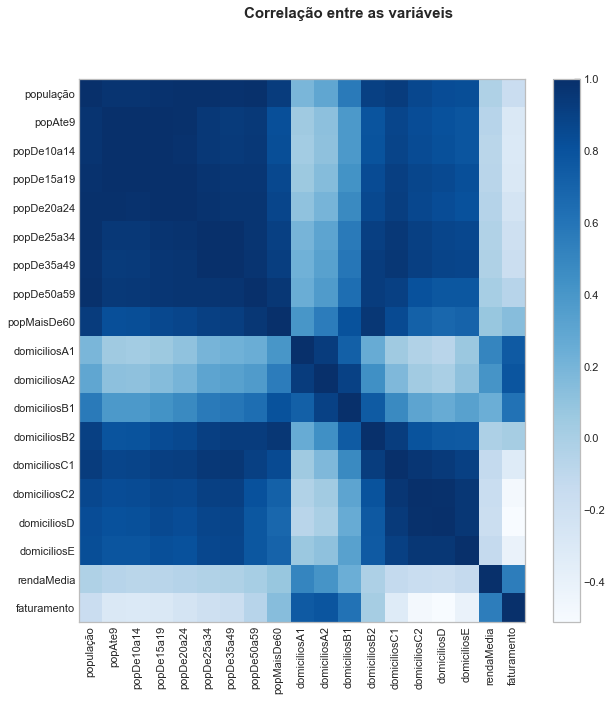

In [29]:
#Obtendo a matriz de correlação dos dados para maiorfatu:

#Mostrar matriz:
plt.figure(figsize = (10,10))

#Mostrar a imagem:
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')

#Mostrar barra lateral de cores:
plt.colorbar()

#Incluir o nome das variáveis:
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlação entre as variáveis', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

### Aparentemente o comportamento de consumo entre as faixas etárias está bem correlacionado entre si e com o comportamento de consumo da população total. Enquanto que menores correlações são encontradas em domicilios A1, A2, B1. Além disso rendaMédia e faturamento são os indíces menos correlacionados com os outros. Logo, a hipótese é de que que quanto maior a rendaMédia do bairro, maior é o faturamento da empresa fictícia. Tal rendaMédia por sua vez é impulsionada pelos indíces dos domicílios A1, A2 e B1. Assim, independente de faixa etária, o público alvo da empresa parece ser compradores desses domicílios, sendo uma condição para expansão dos negócios da empresa a procura por bairros com um maior número desses domicílios. A seguir outras análises exploratórias:

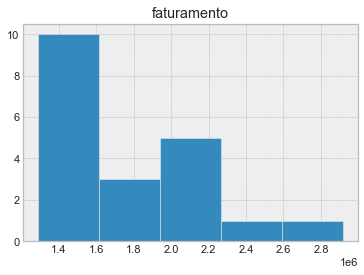

In [30]:
#Histograma dos bairros com maior faturamento:

maiorfatu.hist(column = "faturamento", bins = 5)
plt.show()

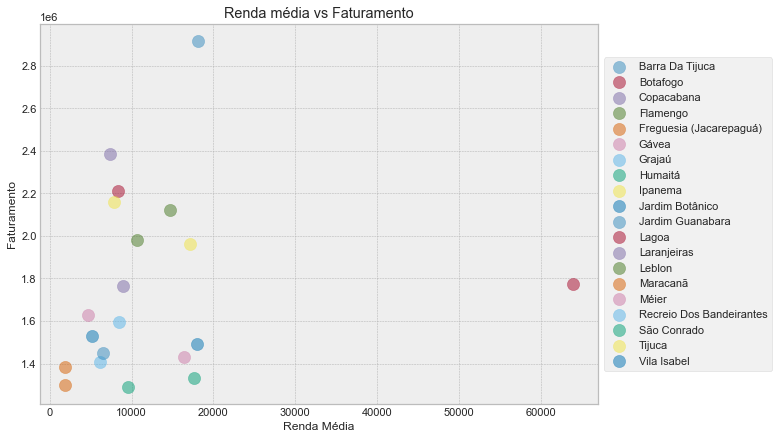

In [31]:
#Verificando a entre as variáveis:
# Renda média vs faturamento:
values2 = ["Barra Da Tijuca", "Botafogo", "Copacabana", "Flamengo", "Freguesia (Jacarepaguá)", "Gávea", "Grajaú", "Humaitá", "Ipanema", "Jardim Botânico", "Jardim Guanabara", "Lagoa", "Laranjeiras", "Leblon", "Maracanã", "Méier", "Recreio Dos Bandeirantes", "São Conrado", "Tijuca", "Vila Isabel"]
plt.figure(1 , figsize = (10 , 7))
for bairro in (values2):
    plt.scatter(x = "rendaMedia" , y = "faturamento" , data = maiorfatu[maiorfatu["bairro"] == bairro] ,
                s = 150 , alpha = 0.5 , label = bairro)
plt.xlabel("Renda Média"), plt.ylabel("Faturamento") 
plt.title("Renda média vs Faturamento")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

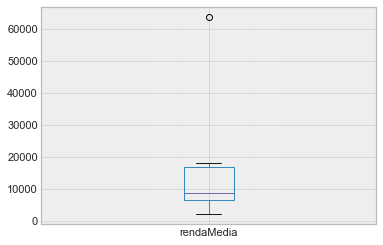

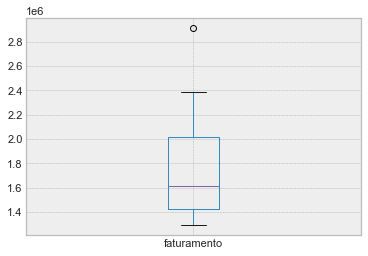

In [32]:
# Boxplot para verificar outliers:

maiorfatu.boxplot(column="rendaMedia")
plt.show()

maiorfatu.boxplot(column="faturamento")
plt.show()

### #A princípio, decidi excluir o outlier para averiguação posterior:

In [33]:
#exclusão do outlier:
maiorfatu = maiorfatu.drop(80)
maiorfatu

,bairro,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
9,Barra Da Tijuca,139761,13038,5225,7432,8627,21914,32089,21058,30378,13408,11668,14820,5205,3437,1841,0,3897,18084.0,2915612.0
15,Botafogo,85229,6278,2608,4410,5911,14697,18262,12026,21037,3669,5165,11669,6106,5289,3009,371,1853,8316.0,2211985.0
36,Copacabana,150524,8562,3727,6383,9168,21814,27567,21858,51445,5740,9218,19350,13160,10982,5482,998,5122,7381.0,2384494.0
50,Flamengo,51456,2612,1241,2044,3049,8071,9582,7426,17431,3253,3648,7334,4041,3677,1434,184,986,10619.0,1981817.0
52,Freguesia (Jacarepaguá),72501,7991,3709,5257,5159,10923,16875,9607,12980,698,2569,6042,4941,5055,3919,704,1670,1915.5,1297388.0
56,Gávea,16455,1210,546,869,1162,2518,3307,2575,4268,1343,1173,1766,979,776,457,0,311,16449.0,1430429.0
59,Grajaú,39762,3570,1607,2310,2629,5733,8312,5731,9870,737,1516,4647,2968,2333,1740,259,865,6194.0,1409134.0
65,Humaitá,13660,911,349,571,787,2256,2922,2237,3627,799,1139,2136,921,564,313,85,204,9504.0,1289705.0
68,Ipanema,43948,3061,1311,1957,2395,5854,8665,6344,14361,4213,3432,4478,2323,2141,1369,117,1460,17188.0,1962438.0
75,Jardim Botânico,18517,1602,664,945,1008,2788,4135,2822,4553,1641,1273,1913,1108,815,361,0,289,17984.0,1491476.0


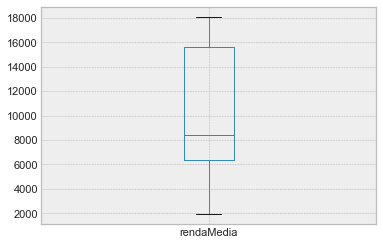

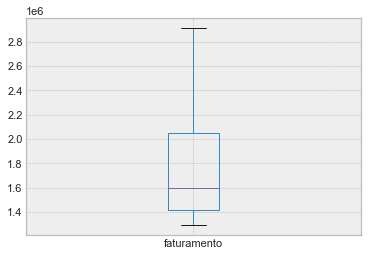

In [34]:
# Boxplot para verificar outliers:

maiorfatu.boxplot(column="rendaMedia")
plt.show()

maiorfatu.boxplot(column="faturamento")
plt.show()

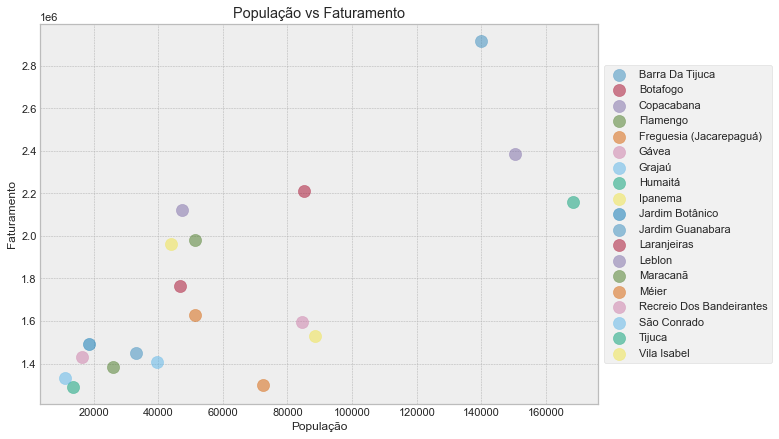

In [35]:
#Verificando a relação entre as variáveis:
# população vs faturamento:
values3 = ["Barra Da Tijuca", "Botafogo", "Copacabana", "Flamengo", "Freguesia (Jacarepaguá)", "Gávea", "Grajaú", "Humaitá", "Ipanema", "Jardim Botânico", "Jardim Guanabara", "Laranjeiras", "Leblon", "Maracanã", "Méier", "Recreio Dos Bandeirantes", "São Conrado", "Tijuca", "Vila Isabel"]
plt.figure(1 , figsize = (10 , 7))
for bairro in (values3):
    plt.scatter(x = "população" , y = "faturamento" , data = maiorfatu[maiorfatu["bairro"] == bairro] ,
                s = 150 , alpha = 0.5, label = bairro)
plt.xlabel("População"), plt.ylabel("Faturamento") 
plt.title("População vs Faturamento")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

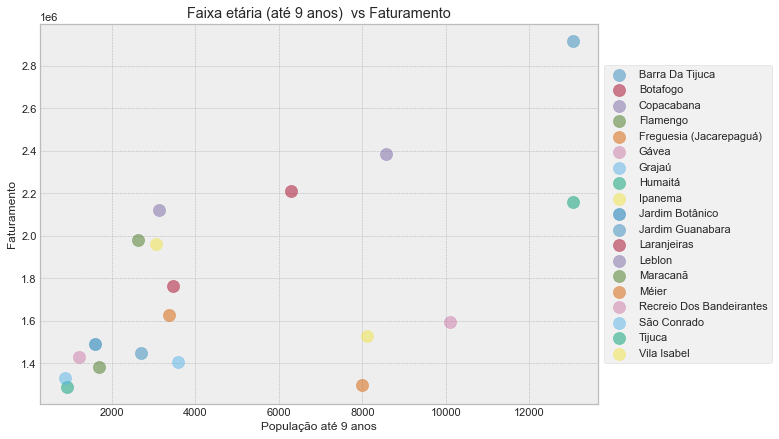

In [36]:
#Verificando a relação entre as variáveis:
# Faixas etárias vs faturamento:
plt.figure(1 , figsize = (10 , 7))
for bairro in (values3):
    plt.scatter(x = "popAte9" , y = "faturamento" , data = maiorfatu[maiorfatu["bairro"] == bairro] ,
                s = 150 , alpha = 0.5 , label = bairro)
plt.xlabel("População até 9 anos"), plt.ylabel("Faturamento") 
plt.title("Faixa etária (até 9 anos)  vs Faturamento")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

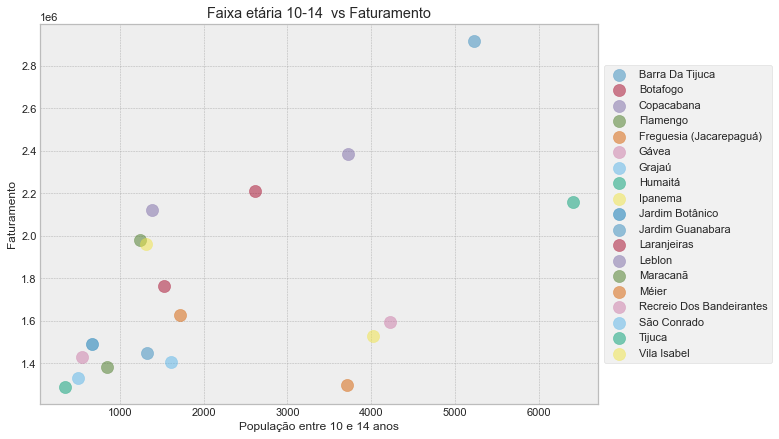

In [37]:
#Verificando a relação entre as variáveis:
# Faixas etárias vs faturamento:
plt.figure(1 , figsize = (10, 7))
for bairro in (values3):
    plt.scatter(x = "popDe10a14" , y = "faturamento" , data = maiorfatu[maiorfatu["bairro"] == bairro] ,
                s = 150 , alpha = 0.5 , label = bairro)
plt.xlabel("População entre 10 e 14 anos"), plt.ylabel("Faturamento") 
plt.title("Faixa etária 10-14  vs Faturamento")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

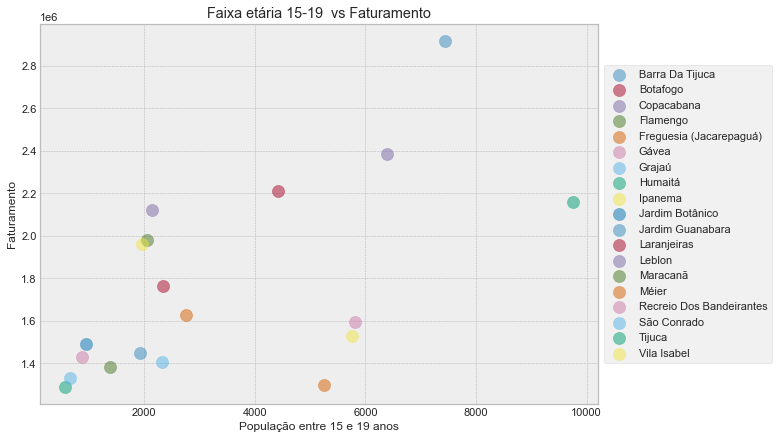

In [38]:
#Verificando a relação entre as variáveis:
# Faixas etárias vs faturamento:
plt.figure(1 , figsize = (10, 7))
for bairro in (values3):
    plt.scatter(x = "popDe15a19" , y = "faturamento" , data = maiorfatu[maiorfatu["bairro"] == bairro] ,
                s = 150 , alpha = 0.5 , label = bairro)
plt.xlabel("População entre 15 e 19 anos"), plt.ylabel("Faturamento") 
plt.title("Faixa etária 15-19  vs Faturamento")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

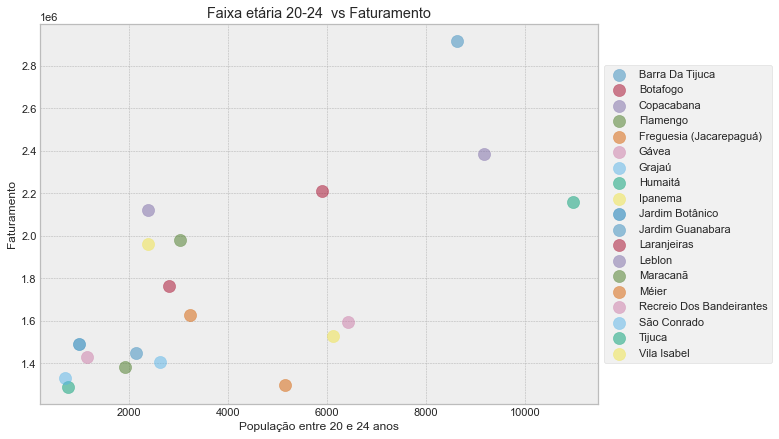

In [39]:
#Verificando a relação entre as variáveis:
# Faixas etárias vs faturamento:
plt.figure(1 , figsize = (10, 7))
for bairro in (values3):
    plt.scatter(x = "popDe20a24" , y = "faturamento" , data = maiorfatu[maiorfatu["bairro"] == bairro] ,
                s = 150 , alpha = 0.5 , label = bairro)
plt.xlabel("População entre 20 e 24 anos"), plt.ylabel("Faturamento") 
plt.title("Faixa etária 20-24  vs Faturamento")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

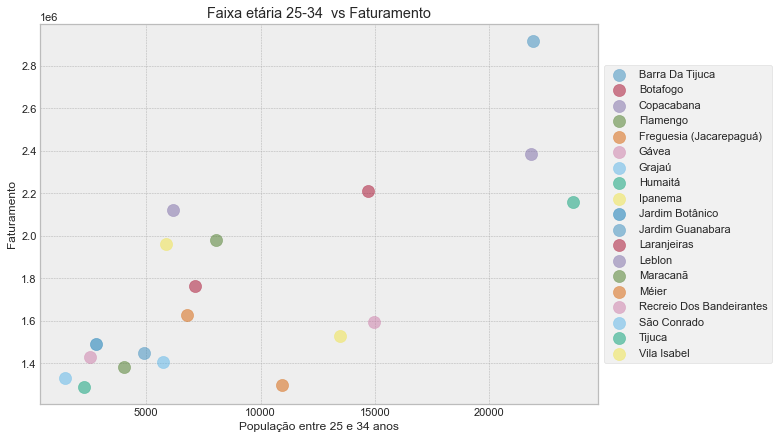

In [40]:
#Verificando a relação entre as variáveis:
# Faixas etárias vs faturamento:
plt.figure(1 , figsize = (10, 7))
for bairro in (values3):
    plt.scatter(x = "popDe25a34" , y = "faturamento" , data = maiorfatu[maiorfatu["bairro"] == bairro] ,
                s = 150 , alpha = 0.5 , label = bairro)
plt.xlabel("População entre 25 e 34 anos"), plt.ylabel("Faturamento") 
plt.title("Faixa etária 25-34  vs Faturamento")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

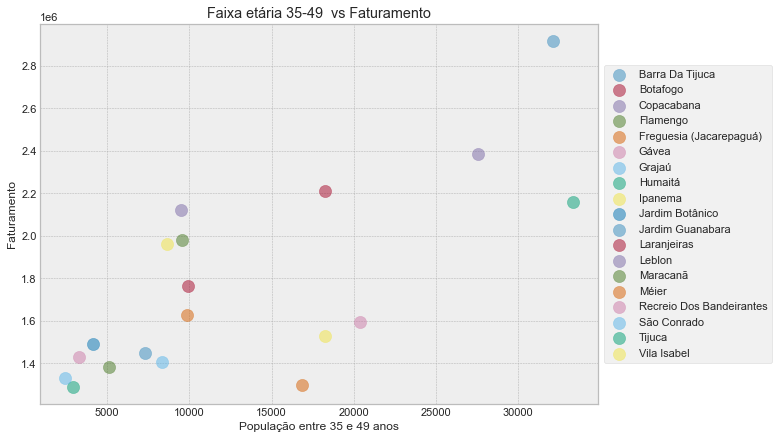

In [41]:
#Verificando a relação entre as variáveis:
# Faixas etárias vs faturamento:
plt.figure(1 , figsize = (10, 7))
for bairro in (values3):
    plt.scatter(x = "popDe35a49" , y = "faturamento" , data = maiorfatu[maiorfatu["bairro"] == bairro] ,
                s = 150 , alpha = 0.5 , label = bairro)
plt.xlabel("População entre 35 e 49 anos"), plt.ylabel("Faturamento") 
plt.title("Faixa etária 35-49  vs Faturamento")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

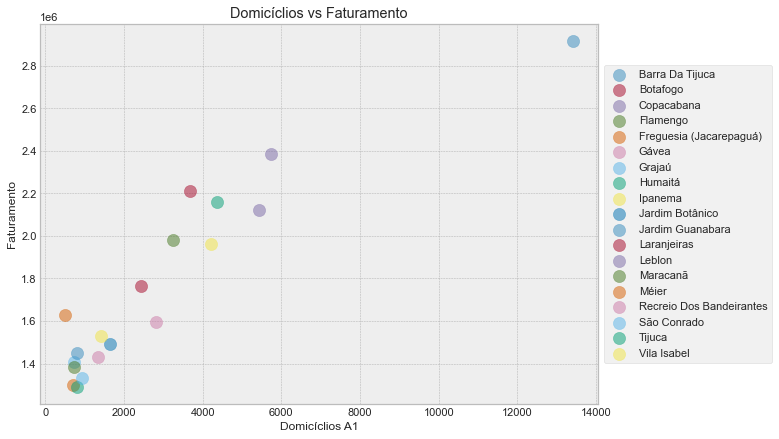

In [42]:
#Verificando se há reação linear entre as variáveis:
# Faixas etárias vs faturamento:
plt.figure(1 , figsize = (10, 7))
for bairro in (values3):
    plt.scatter(x = "domiciliosA1" , y = "faturamento" , data = maiorfatu[maiorfatu["bairro"] == bairro] ,
                s = 150 , alpha = 0.5 , label = bairro)
plt.xlabel("Domicíclios A1"), plt.ylabel("Faturamento") 
plt.title("Domicíclios vs Faturamento")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

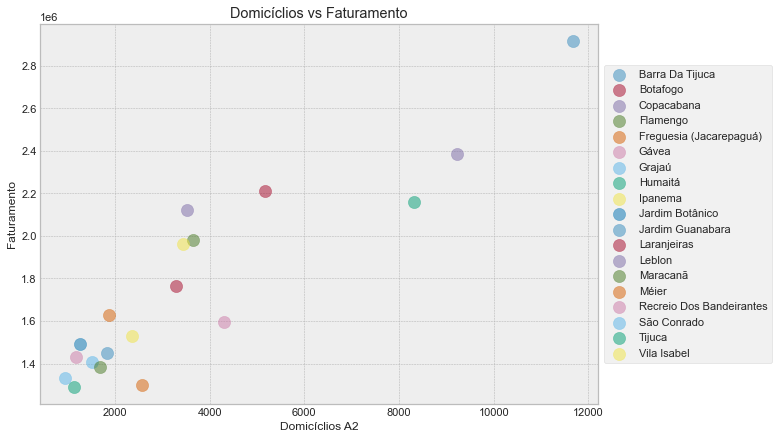

In [43]:
#Verificando se há reação linear entre as variáveis:
# Faixas etárias vs faturamento:
plt.figure(1 , figsize = (10, 7))
for bairro in (values3):
    plt.scatter(x = "domiciliosA2" , y = "faturamento" , data = maiorfatu[maiorfatu["bairro"] == bairro] ,
                s = 150 , alpha = 0.5 , label = bairro)
plt.xlabel("Domicíclios A2"), plt.ylabel("Faturamento") 
plt.title("Domicíclios vs Faturamento")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

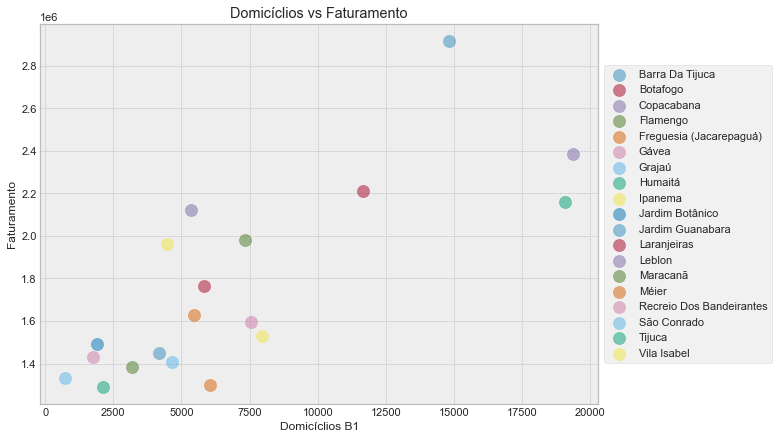

In [44]:
#Verificando se há reação linear entre as variáveis:
# Faixas etárias vs faturamento:
plt.figure(1 , figsize = (10, 7))
for bairro in (values3):
    plt.scatter(x = "domiciliosB1" , y = "faturamento" , data = maiorfatu[maiorfatu["bairro"] == bairro] ,
                s = 150 , alpha = 0.5 , label = bairro)
plt.xlabel("Domicíclios B1"), plt.ylabel("Faturamento") 
plt.title("Domicíclios vs Faturamento")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

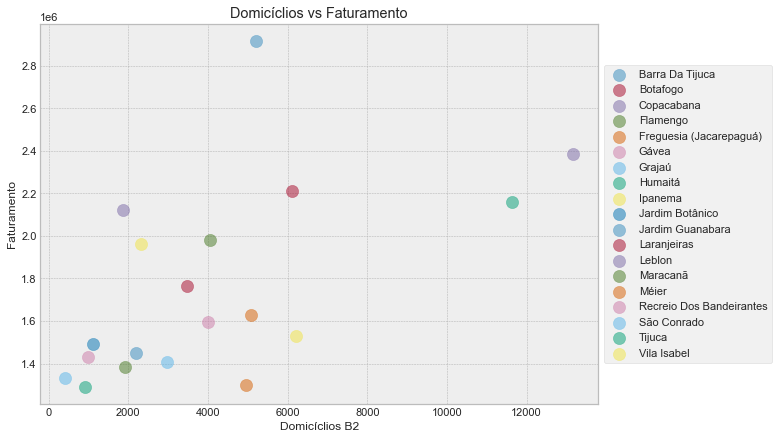

In [45]:
#Verificando se há reação linear entre as variáveis:
# Faixas etárias vs faturamento:
plt.figure(1 , figsize = (10, 7))
for bairro in (values3):
    plt.scatter(x = "domiciliosB2" , y = "faturamento" , data = maiorfatu[maiorfatu["bairro"] == bairro] ,
                s = 150 , alpha = 0.5 , label = bairro)
plt.xlabel("Domicíclios B2"), plt.ylabel("Faturamento") 
plt.title("Domicíclios vs Faturamento")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

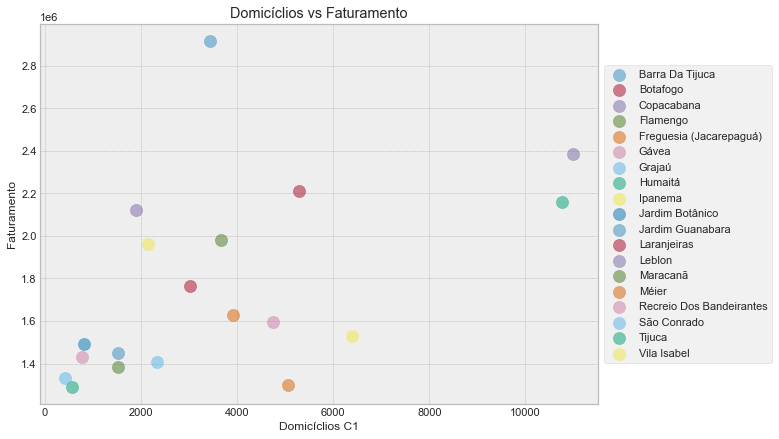

In [46]:
#Verificando se há reação linear entre as variáveis:
# Faixas etárias vs faturamento:
plt.figure(1 , figsize = (10, 7))
for bairro in (values3):
    plt.scatter(x = "domiciliosC1" , y = "faturamento" , data = maiorfatu[maiorfatu["bairro"] == bairro] ,
                s = 150 , alpha = 0.5 , label = bairro)
plt.xlabel("Domicíclios C1"), plt.ylabel("Faturamento") 
plt.title("Domicíclios vs Faturamento")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

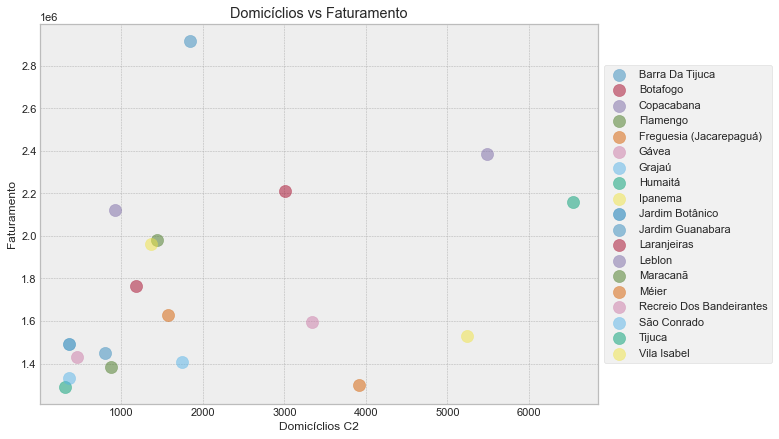

In [47]:
#Verificando se há reação linear entre as variáveis:
# Faixas etárias vs faturamento:
plt.figure(1 , figsize = (10, 7))
for bairro in (values3):
    plt.scatter(x = "domiciliosC2" , y = "faturamento" , data = maiorfatu[maiorfatu["bairro"] == bairro] ,
                s = 150 , alpha = 0.5 , label = bairro)
plt.xlabel("Domicíclios C2"), plt.ylabel("Faturamento") 
plt.title("Domicíclios vs Faturamento")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

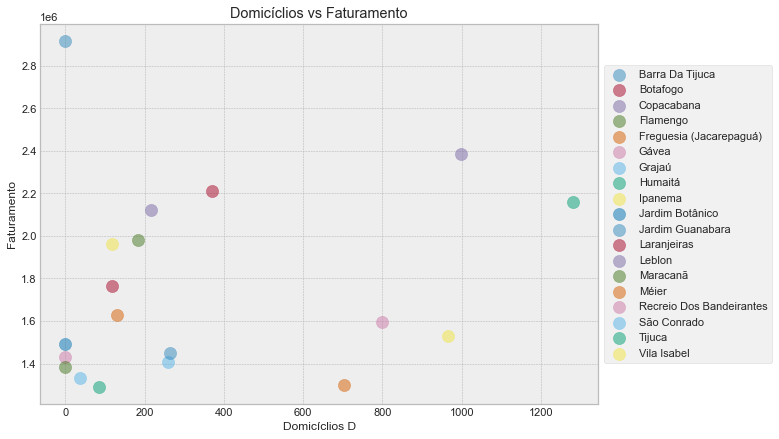

In [48]:
#Verificando se há reação linear entre as variáveis:
# Faixas etárias vs faturamento:
plt.figure(1 , figsize = (10, 7))
for bairro in (values3):
    plt.scatter(x = "domiciliosD" , y = "faturamento" , data = maiorfatu[maiorfatu["bairro"] == bairro] ,
                s = 150 , alpha = 0.5 , label = bairro)
plt.xlabel("Domicíclios D"), plt.ylabel("Faturamento") 
plt.title("Domicíclios vs Faturamento")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

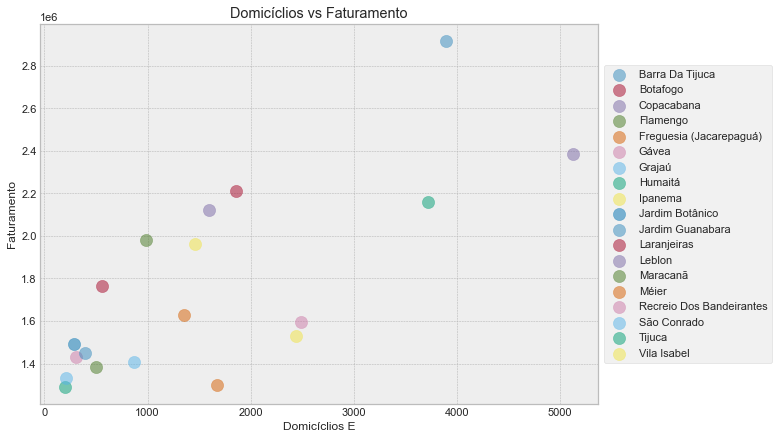

In [49]:
#Verificando se há reação linear entre as variáveis:
# Faixas etárias vs faturamento:
plt.figure(1 , figsize = (10, 7))
for bairro in (values3):
    plt.scatter(x = "domiciliosE" , y = "faturamento" , data = maiorfatu[maiorfatu["bairro"] == bairro] ,
                s = 150 , alpha = 0.5 , label = bairro)
plt.xlabel("Domicíclios E"), plt.ylabel("Faturamento") 
plt.title("Domicíclios vs Faturamento")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Espacialização dos dados para auxiliar a análise exploratória:

In [50]:
#Para espacialização dos dados, primeiro resetei o index do df maiorfatu:
maiorfatu = maiorfatu.reset_index()
maiorfatu

,index,bairro,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,...,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,9,Barra Da Tijuca,139761,13038,5225,7432,8627,21914,32089,21058,...,13408,11668,14820,5205,3437,1841,0,3897,18084.0,2915612.0
1,15,Botafogo,85229,6278,2608,4410,5911,14697,18262,12026,...,3669,5165,11669,6106,5289,3009,371,1853,8316.0,2211985.0
2,36,Copacabana,150524,8562,3727,6383,9168,21814,27567,21858,...,5740,9218,19350,13160,10982,5482,998,5122,7381.0,2384494.0
3,50,Flamengo,51456,2612,1241,2044,3049,8071,9582,7426,...,3253,3648,7334,4041,3677,1434,184,986,10619.0,1981817.0
4,52,Freguesia (Jacarepaguá),72501,7991,3709,5257,5159,10923,16875,9607,...,698,2569,6042,4941,5055,3919,704,1670,1915.5,1297388.0
5,56,Gávea,16455,1210,546,869,1162,2518,3307,2575,...,1343,1173,1766,979,776,457,0,311,16449.0,1430429.0
6,59,Grajaú,39762,3570,1607,2310,2629,5733,8312,5731,...,737,1516,4647,2968,2333,1740,259,865,6194.0,1409134.0
7,65,Humaitá,13660,911,349,571,787,2256,2922,2237,...,799,1139,2136,921,564,313,85,204,9504.0,1289705.0
8,68,Ipanema,43948,3061,1311,1957,2395,5854,8665,6344,...,4213,3432,4478,2323,2141,1369,117,1460,17188.0,1962438.0
9,75,Jardim Botânico,18517,1602,664,945,1008,2788,4135,2822,...,1641,1273,1913,1108,815,361,0,289,17984.0,1491476.0


In [51]:
#Inseri um .csv de coordenadas lat x long dos bairros de maior faturamento para espacialização:
geoloc = pd.read_csv("geolocation.csv")
geoloc

,bairroRJ,lat,long
0,Barra Da Tijuca,-22.99974,-43.36599
1,Botafogo,-22.95036,-43.18422
2,Copacabana,-22.97196,-43.18434
3,Flamengo,-22.93398,-43.17457
4,Freguesia (Jacarepaguá),-22.94089,-43.34226
5,Gávea,-22.98142,-43.23832
6,Grajaú,-22.92988,-43.26955
7,Humaitá,-22.95464,-43.20048
8,Ipanema,-22.98396,-43.20222
9,Jardim Botânico,-22.96364,-22.96364


In [52]:
geoloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bairroRJ  19 non-null     object 
 1   lat       19 non-null     float64
 2   long      19 non-null     float64
dtypes: float64(2), object(1)
memory usage: 584.0+ bytes


In [53]:
#Concatenei os dataframes para espacialização:
FatuMap = pd.concat([geoloc,maiorfatu], axis = 1)
FatuMap

,bairroRJ,lat,long,index,bairro,população,popAte9,popDe10a14,popDe15a19,popDe20a24,...,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,Barra Da Tijuca,-22.99974,-43.36599,9,Barra Da Tijuca,139761,13038,5225,7432,8627,...,13408,11668,14820,5205,3437,1841,0,3897,18084.0,2915612.0
1,Botafogo,-22.95036,-43.18422,15,Botafogo,85229,6278,2608,4410,5911,...,3669,5165,11669,6106,5289,3009,371,1853,8316.0,2211985.0
2,Copacabana,-22.97196,-43.18434,36,Copacabana,150524,8562,3727,6383,9168,...,5740,9218,19350,13160,10982,5482,998,5122,7381.0,2384494.0
3,Flamengo,-22.93398,-43.17457,50,Flamengo,51456,2612,1241,2044,3049,...,3253,3648,7334,4041,3677,1434,184,986,10619.0,1981817.0
4,Freguesia (Jacarepaguá),-22.94089,-43.34226,52,Freguesia (Jacarepaguá),72501,7991,3709,5257,5159,...,698,2569,6042,4941,5055,3919,704,1670,1915.5,1297388.0
5,Gávea,-22.98142,-43.23832,56,Gávea,16455,1210,546,869,1162,...,1343,1173,1766,979,776,457,0,311,16449.0,1430429.0
6,Grajaú,-22.92988,-43.26955,59,Grajaú,39762,3570,1607,2310,2629,...,737,1516,4647,2968,2333,1740,259,865,6194.0,1409134.0
7,Humaitá,-22.95464,-43.20048,65,Humaitá,13660,911,349,571,787,...,799,1139,2136,921,564,313,85,204,9504.0,1289705.0
8,Ipanema,-22.98396,-43.20222,68,Ipanema,43948,3061,1311,1957,2395,...,4213,3432,4478,2323,2141,1369,117,1460,17188.0,1962438.0
9,Jardim Botânico,-22.96364,-22.96364,75,Jardim Botânico,18517,1602,664,945,1008,...,1641,1273,1913,1108,815,361,0,289,17984.0,1491476.0


In [54]:
#Espacialização através do folium:
coordenadas = FatuMap[['lat', 'long', 'faturamento']]
geolocMap = folium.Map(width = "100%", height = "100%",
                       location=[-22.908333, -43.196388])
geolocMap.add_child(plugins.HeatMap(coordenadas))
geolocMap.save("mapa-faturamento.html")
geolocMap

In [55]:
coordenadas = FatuMap[['lat', 'long', 'rendaMedia']]
geolocMap_renda = folium.Map(width = "100%", height = "100%",
                       location=[-22.908333, -43.196388])
geolocMap_renda.add_child(plugins.HeatMap(coordenadas))
geolocMap_renda.save("mapa-renda.html")
geolocMap_renda

In [56]:
coordenadas = FatuMap[['lat', 'long', 'domiciliosA1']]
geolocMap_AI = folium.Map(width = "100%", height = "100%",
                       location=[-22.908333, -43.196388])
geolocMap_AI.add_child(plugins.HeatMap(coordenadas))
geolocMap_AI.save("mapa-AI.html")
geolocMap_AI

In [57]:
coordenadas = FatuMap[['lat', 'long', 'domiciliosA2']]
geolocMap_AII = folium.Map(width = "100%", height = "100%",
                       location=[-22.908333, -43.196388])
geolocMap_AII.add_child(plugins.HeatMap(coordenadas))
geolocMap_AII.save("mapa-AII.html")
geolocMap_AII

In [58]:
coordenadas = FatuMap[['lat', 'long', 'domiciliosB1']]
geolocMap_BI = folium.Map(width = "100%", height = "100%",
                       location=[-22.908333, -43.196388])
geolocMap_BI.add_child(plugins.HeatMap(coordenadas))
geolocMap_BI.save("mapa-BI.html")
geolocMap_BI

In [59]:
coordenadas = FatuMap[['lat', 'long', 'população']]
geolocMap_pop = folium.Map(width = "100%", height = "100%",
                       location=[-22.908333, -43.196388])
geolocMap_pop.add_child(plugins.HeatMap(coordenadas))
geolocMap_pop.save("mapa-pop.html")
geolocMap_pop

### Modelo regressão para tomada de decisão sobre expansão dos negócios da empresa fictícia:

In [60]:
#Modelo ML
#Regressão linear com datarj

X = datarj[['rendaMedia','população']]
X

,rendaMedia,população
0,2501.0,11676
1,931.0,27564
2,2391.0,9003
3,3727.0,9606
4,1380.0,57222
...,...,...
155,2316.0,18791
156,2416.0,13556
157,3189.0,33190
158,2418.0,8867


In [61]:
#Separando conjuntos de treino e teste para o modelo, com 30% de teste

x_train, x_test, y_train, y_test = train_test_split(X,datarj.faturamento,test_size = 0.3)

#Verificando o shape dos dados de treino:
x_train.shape, y_train.shape

((112, 2), (112,))

In [62]:
#Verificando o shape dos dados de teste:
x_test.shape, y_test.shape

((48, 2), (48,))

In [63]:
#Instânciando a regressão linear:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [64]:
#Treinando o modelo:

lreg.fit(x_train, y_train)

LinearRegression()

In [65]:
#Predizendo valores para o conjunto test:
pred = lreg.predict(x_test)

In [66]:
#Calculando MSE:
mse = np.mean((pred - y_test)**2)
mse

104138545601.4182

In [67]:
#Calculo de coeficientes:
coeff = pd.DataFrame(x_train.columns)
coeff['Coeficientes'] = pd.Series(lreg.coef_)
coeff

,0,Coeficientes
0,rendaMedia,36.268318
1,população,-1.385227


In [68]:
#Calculo de r-squared
lreg.score(x_test,y_test)

0.35054625814663787

In [77]:
#Modelo ML
#Regressão linear com datarj

X = datarj[['rendaMedia','população', 'domiciliosA1','domiciliosA2','domiciliosB1']]
X

,rendaMedia,população,domiciliosA1,domiciliosA2,domiciliosB1
0,2501.0,11676,0,145,715
1,931.0,27564,0,0,82
2,2391.0,9003,0,96,404
3,3727.0,9606,114,178,393
4,1380.0,57222,0,0,1089
...,...,...,...,...,...
155,2316.0,18791,0,259,774
156,2416.0,13556,0,219,714
157,3189.0,33190,0,906,2866
158,2418.0,8867,0,87,556


In [78]:
#Separando conjuntos de treino e teste para o modelo, com 30% de teste

x_train, x_test, y_train, y_test = train_test_split(X,datarj.faturamento,test_size = 0.3)

#Verificando o shape dos dados de treino:
x_train.shape, y_train.shape

((112, 5), (112,))

In [79]:
#Verificando o shape dos dados de teste:
x_test.shape, y_test.shape

((48, 5), (48,))

In [80]:
#Treinando o modelo:

lreg.fit(x_train, y_train)

LinearRegression()

In [81]:
#Predizendo valores para o conjunto test:
pred = lreg.predict(x_test)

In [82]:
#Calculando MSE:
mse = np.mean((pred - y_test)**2)
mse

22962442876.290783

In [83]:
#Calculo de coeficientes:
coeff = pd.DataFrame(x_train.columns)
coeff['Coeficientes'] = pd.Series(lreg.coef_)
coeff

,0,Coeficientes
0,rendaMedia,16.603015
1,população,-3.978291
2,domiciliosA1,56.346855
3,domiciliosA2,5.139480
4,domiciliosB1,105.535507


In [84]:
#Calculo de r-squared
lreg.score(x_test,y_test)

0.852066755908804

<AxesSubplot:>

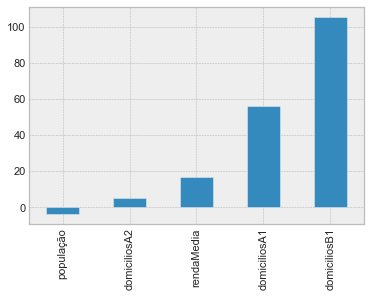

In [85]:
#Regularização
#Verificando a magnitude dos coeficientes:

predictors = x_train.columns
coef = pd.Series(lreg.coef_,predictors).sort_values()
coef.plot(kind='bar')

In [86]:
#Treinando o modelo com Ridge from sklearn
#from sklearn.linear_model import Ridge
#ridgeReg = Ridge(alpha=0.05, normalize=True)
#ridgeReg.fit(x_train,y_train)

In [87]:
#Predição e calculo de mse
#pred = ridgeReg.predict(x_test)
#mse = np.mean((pred-y_test)**2)
#mse

In [88]:
#ridgeReg.score(x_test,y_test)

### Uma vez que atraves de Ridge o poder de explicação do modelo diminuiu um pouco, opto por utilizar o modelo linear.

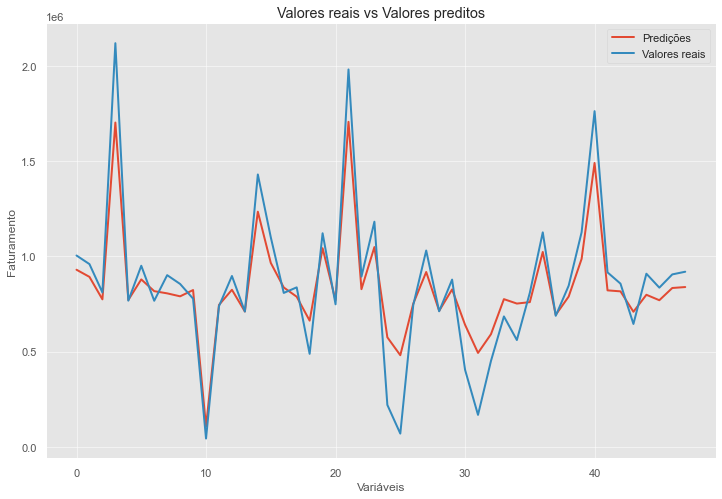

In [89]:
predicoes = pd.DataFrame(pred[:100])
y_teste2 = pd.DataFrame(y_test.values[:100])

plt.style.use('ggplot')
plt.figure(figsize = (12,8))
plt.xlabel("Variáveis")
plt.ylabel("Faturamento")
plt.title("Valores reais vs Valores preditos")

plt.plot(predicoes)
plt.plot(y_teste2)

plt.legend(['Predições','Valores reais'])
plt.show()

### Quanto à hipótese inicial de que quanto maior a rendaMédia do bairro, maior é o faturamento da empresa fictícia, não necessáriamente os domícilios de A1 impulsionam o faturamento da empresa fictícia, mesmo que o bairro Barra da Tijuca possua um número expressivo de domícilios A1, podendo ser caracterizado como um hotspot de domícilios A1, de acordo com a regressão linear, a variável que mais explica o faturamento é Domicílios B1. Esse resultado é corroborado quando compara-se os mapas de faturamento e domicílios.